<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>

<div class="note-box">
    <h2>📘 Chapter 3: Transfer Learning</h2>
    <p>
        Welcome to <strong>Notebook 03</strong>. In this session, we will leverage the power of <strong>Transfer Learning</strong> using the <strong>ResNet18</strong> architecture.
    </p>
    <p>
        Instead of training a Deep Neural Network from scratch (which takes days and millions of images), we will take a model pre-trained on the massive <strong>ImageNet</strong> database and "teach" it to recognize a new set of objects with a very small amount of data.
    </p>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>⚙️ Part 1: Imports & Hardware Acceleration</h2>
    <p>
        Before we begin, we need to import PyTorch and <strong>Torchvision</strong> (the library containing datasets and models).
    </p>
    <p>
        Crucially, we must select the correct hardware accelerator. Since I was  using an Apple Silicon chip (M4), I could not use NVIDIA's CUDA. Instead, I use Apple's <strong>MPS (Metal Performance Shaders)</strong>.
    </p>
    <ul>
        <li><span class="code-inline">torch.device("mps")</span>: Tells PyTorch to run computations on the Mac GPU.</li>
        <li><span class="code-inline">torch.device("cpu")</span>: The fallback option (much slower).</li>
    </ul>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import time

# 1. Device Configuration (Apple Silicon Optimization)
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("✅ Using Apple GPU (MPS backend)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("✅ Using CUDA")
else:
    device = torch.device("cpu")
    print("⚠️ Using CPU")

✅ Using Apple GPU (MPS backend)


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>📊 Part 2: Data Preprocessing</h2>
    <p>
        Neural Networks expect input data to be in a very specific format. Here we define our <strong>Transforms</strong>:
    </p>
    <ul>
        <li><strong>Resize(224):</strong> ResNet was designed to accept 224x224 pixel images. We must resize our images to match this.</li>
        <li><strong>Normalize:</strong> We subtract the mean and divide by the standard deviation of the <strong>ImageNet</strong> dataset. This helps the model converge faster because the input data distribution matches what the pre-trained model expects.</li>
    </ul>
    <p>
        We also create <strong>DataLoaders</strong>, which allow us to iterate through the data in "batches" (e.g., 32 images at a time) rather than loading the whole dataset into RAM at once.
    </p>
</div>

In [2]:
# We will use CIFAR-10 as a stand-in for a "small dataset" to demonstrate the concept.
# In a real scenario, this would be your custom dataset (e.g., Medical Images, Trash Classification).

# Define transforms: ResNet expects 224x224 images and specific normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # ImageNet means/stds
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Downloading Data... (This might take a minute)")

# Load CIFAR-10 (subsetting to make it run faster for demonstration)
full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transforms['train'])
full_val_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=data_transforms['val'])

# Create smaller subsets to simulate "Scarcity of Data" and speed up training
train_dataset = torch.utils.data.Subset(full_train_dataset, range(0, 1000)) 
val_dataset = torch.utils.data.Subset(full_val_dataset, range(0, 500))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

class_names = full_train_dataset.classes
print(f"Classes: {class_names}")

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>👁️ Part 3: Visualizing the Data</h2>
    <p>
        It is essential to look at your data before training. However, because we <strong>normalized</strong> the images in the previous step (altering their math values), they will look "weird" (neon or dark) if we display them directly.
    </p>
    <p>
        The <span class="code-inline">imshow</span> function below performs an <strong>Un-normalization</strong> (reverse engineering the math) so the images look natural again for human eyes.
    </p>
</div>

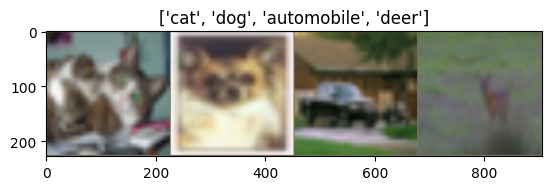

In [5]:
import torchvision
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs[:4])
imshow(out, title=[class_names[x] for x in classes[:4]])

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>🧠 Concept: What is ResNet?</h2>
    <p>
        We are using <strong>ResNet18</strong> (Residual Network). Before 2015, training very deep networks was impossible due to the <strong>Vanishing Gradient Problem</strong>: as the network learned, the signal got weaker and weaker as it passed backward through the layers, eventually disappearing before it reached the beginning.
    </p>
    <p>
        <strong>The Solution: Skip Connections (Residual Blocks)</strong>
    </p>
    <p>
        ResNet introduced "shortcuts" that allow the signal to skip over layers. 
    </p>
    <ul>
        <li>Imagine you are climbing a 100-story building. Standard networks are like taking the stairs; you get exhausted (signal loss) by floor 20.</li>
        <li><strong>ResNet</strong> is like having an elevator that can skip 10 floors at a time. It preserves the information flow.</li>
    </ul>
    <p>
        This architecture allowed networks to go from 20 layers to 150+ layers deep, revolutionizing Computer Vision.
    </p>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>🔄 Concept: Transfer Learning</h2>
    <p>
        Why are we downloading a model trained on <strong>ImageNet</strong>?
    </p>
    <p>
        <strong>ImageNet</strong> contains 1.2 million images of 1,000 categories (dogs, whales, cars, lamps, etc.). A model trained on this has already learned how to "see."
    </p>
    <ul>
        <li><strong>Early Layers:</strong> Detect edges, corners, and textures (Universal features).</li>
        <li><strong>Middle Layers:</strong> Detect shapes (circles, squares, eyes).</li>
        <li><strong>Final Layers:</strong> Detect complex objects (faces, tires).</li>
    </ul>
    <p>
        <strong>The Strategy:</strong>
    </p>
    <ol>
        <li><strong>Load Weights:</strong> Import the "knowledge" from ImageNet.</li>
        <li><strong>Freeze Layers:</strong> Lock the early layers (<span class="code-inline">requires_grad = False</span>) so we don't destroy this pre-learned knowledge.</li>
        <li><strong>Replace Head:</strong> Cut off the final layer (which outputs 1,000 ImageNet classes) and replace it with a new layer that outputs <strong>10 classes</strong> (for our CIFAR-10 dataset).</li>
        <li><strong>Fine-Tune:</strong> Train <em>only</em> the new final layer.</li>
    </ol>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>🏗️ Part 4: Modifying the Model</h2>
    <p>
        Here we implement the Transfer Learning strategy.
    </p>
    <ul>
        <li><span class="code-inline">weights='DEFAULT'</span>: Downloads the best available pre-trained weights.</li>
        <li><span class="code-inline">param.requires_grad = False</span>: This is the "Freezing" step. It tells PyTorch not to update these weights during training.</li>
        <li><span class="code-inline">model.fc</span>: This is the final "Fully Connected" layer. We overwrite it with a new Linear layer that has 10 outputs.</li>
    </ul>
</div>

In [6]:
# 2. Load Pre-trained ResNet18
# weights='DEFAULT' loads the best available weights trained on ImageNet
model = models.resnet18(weights='DEFAULT')

# 3. Freeze Weights (Feature Extraction)
# We freeze all layers so we don't destroy the patterns learned from ImageNet
for param in model.parameters():
    param.requires_grad = False

# 4. Modify the Final Layer (The Classifier Head)
# ResNet's final layer is named 'fc' (Fully Connected).
# We replace it with a new layer that matches our number of classes (10 for CIFAR).
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10) # 10 is the number of classes in CIFAR-10

# Move model to Apple GPU
model = model.to(device)

print("Model modified for Transfer Learning.")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/heliamirhosseini/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100.0%


Model modified for Transfer Learning.


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>🏋️ Part 5: The Training Loop</h2>
    <p>
        We now train the model. Note that we define the optimizer to update <strong>only</strong> <span class="code-inline">model.fc.parameters()</span>. The rest of the network is frozen!
    </p>
    <p>
        <strong>Key Fix for Apple Silicon (MPS):</strong>
    </p>
    <p>
        The MPS backend does not support 64-bit floats (<span class="code-inline">float64</span>). We must explicitly use <span class="code-inline">.float()</span> (32-bit) when calculating accuracy, otherwise the code will crash with a TypeError.
    </p>
</div>

In [8]:
# Cell 6: Training Loop 

criterion = nn.CrossEntropyLoss()
# Optimize only the final layer
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

def train_model(model, criterion, optimizer, num_epochs=5):
    since = time.time()
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            
            # --- FIX IS HERE: Changed .double() to .float() ---
            epoch_acc = running_corrects.float() / len(dataloader.dataset) 
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    return model

# Train the model
model = train_model(model, criterion, optimizer, num_epochs=5)

Epoch 0/4
----------
train Loss: 1.8316 Acc: 0.4070
val Loss: 1.6832 Acc: 0.5060
Epoch 1/4
----------
train Loss: 1.4970 Acc: 0.5770
val Loss: 1.4558 Acc: 0.5720
Epoch 2/4
----------
train Loss: 1.2740 Acc: 0.6650
val Loss: 1.3141 Acc: 0.6020
Epoch 3/4
----------
train Loss: 1.1470 Acc: 0.6990
val Loss: 1.2116 Acc: 0.6120
Epoch 4/4
----------
train Loss: 1.0369 Acc: 0.7230
val Loss: 1.1447 Acc: 0.6500
Training complete in 0m 18s


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>🔍 Part 6: Visual Validation</h2>
    <p>
        Now that training is complete, we should look at the results. This function switches the model to <strong>Evaluation Mode</strong> (<span class="code-inline">model.eval()</span>) and runs a few images through it to display the predicted labels vs the actual images.
    </p>
</div>

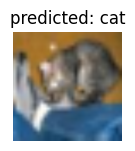

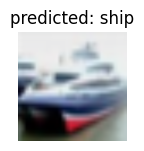

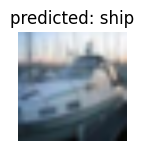

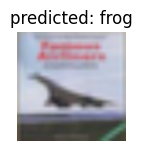

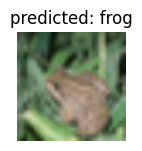

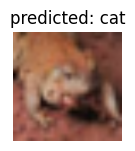

In [9]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

visualize_model(model)

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>📈 Part 7: Final Accuracy</h2>
    <p>
        Visualizing 6 images is nice, but we need hard numbers. This cell calculates the total accuracy over the validation set.
    </p>
    <p>
        <strong>Note:</strong> We also use <span class="code-inline">torch.no_grad()</span> here. This tells PyTorch "we are not training right now, so don't waste memory calculating gradients." This makes inference much faster.
    </p>
</div>

In [10]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # Set model to evaluation mode
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            
            scores = model(x)
            _, predictions = scores.max(1)
            
            # Sum up correct predictions
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
    # Calculate accuracy
    # We use float() to ensure compatibility with MPS (Apple Silicon)
    acc = float(num_correct) / float(num_samples) * 100
    print(f'Got {num_correct} / {num_samples} correct')
    print(f'Accuracy: {acc:.2f}%')

print("Checking accuracy on validation set...")
check_accuracy(val_loader, model)

Checking accuracy on validation set...
Got 325 / 500 correct
Accuracy: 65.00%


In [11]:
# Optional: Check accuracy per class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in val_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        
        # Iterate over the batch
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

print("\nAccuracy per class:")
for i in range(10):
    if class_total[i] > 0:
        print(f'{class_names[i]:>10}: {100 * class_correct[i] / class_total[i]:.2f}%')
    else:
        print(f'{class_names[i]:>10}: N/A (no samples)')


Accuracy per class:
  airplane: 66.67%
automobile: 75.61%
      bird: 27.45%
       cat: 59.18%
      deer: 65.00%
       dog: 64.58%
      frog: 81.48%
     horse: 63.83%
      ship: 68.42%
     truck: 76.79%
